In [5]:
import pandas as pd
from matplotlib import pyplot as plt

***Loading CSV into DataFrame***

In [6]:
eutempdf = pd.read_csv('EuCitiesTemperatures.csv')

### Preprocessing/Analysis

***1. Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.***

In [7]:
eutempdf['latitude'] = eutempdf.groupby('country')['latitude'].apply(lambda x:round(x.fillna(x.mean()), 2))
eutempdf['longitude'] = eutempdf.groupby('country')['longitude'].apply(lambda x:round(x.fillna(x.mean()), 2))
eutempdf

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


***2. Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)***

In [8]:
lat_long_thresholddf = eutempdf[(eutempdf['latitude'] >= 40) & (eutempdf['latitude'] <= 60) & 
                                (eutempdf['longitude'] >= 15) & (eutempdf['longitude'] <= 30)]
lat_long_thresholddf

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,52.61,27.57,5.28
8,Orsha,Belarus,9.48,no,no,52.61,25.64,4.93
9,Pinsk,Belarus,9.48,no,no,52.61,25.64,6.42
...,...,...,...,...,...,...,...,...
165,Bursa,Turkey,79.62,no,yes,40.20,29.07,11.16
169,Edirne,Turkey,79.62,no,yes,41.67,26.57,NaN
183,Tekirdag,Turkey,79.62,no,yes,40.99,27.51,13.02
186,Chernivtsi,Ukraine,44.62,no,yes,48.71,25.92,7.06


In [9]:
# countries with max number of cities in geographical band
lat_long_counts = lat_long_thresholddf['country'].value_counts()
max_lat_long_counts = lat_long_counts[lat_long_counts == lat_long_counts.max()]
print('Coutries with Max Cities in bound:\n', max_lat_long_counts)

Coutries with Max Cities in bound:
 Romania    9
Poland     9
Name: country, dtype: int64


***3. Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).***

In [11]:
eutempdf['temperature'] = eutempdf.groupby(['EU', 'coastline'])['temperature'].apply(
    lambda x:round(x.fillna(x.mean()), 2))
eutempdf

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.48
2,Innsbruck,Austria,8.57,yes,no,47.85,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,14.02,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,-2.94,10.31
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,53.55,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


### Visualization

***1. Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above***

In [12]:
cities_in_region = eutempdf.groupby('EU')['coastline'].value_counts()

In [13]:
yes_no = cities_in_region['yes']['no']
yes_yes = cities_in_region['yes']['yes']
no_yes = cities_in_region['no']['yes']
no_no = cities_in_region['no']['no']
regions = ['yes/no', 'yes/yes', 'no/yes', 'no/no']
num_cities = [yes_no, yes_yes, no_yes, no_no]

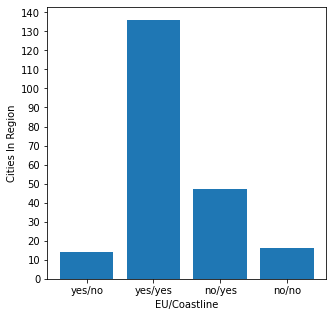

In [14]:
plt.figure(figsize=(5,5))
plt.bar(regions, num_cities)
plt.yticks(range(0, 141, 10))
plt.xlabel('EU/Coastline')
plt.ylabel('Cities In Region')
plt.show()

***2. Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.***

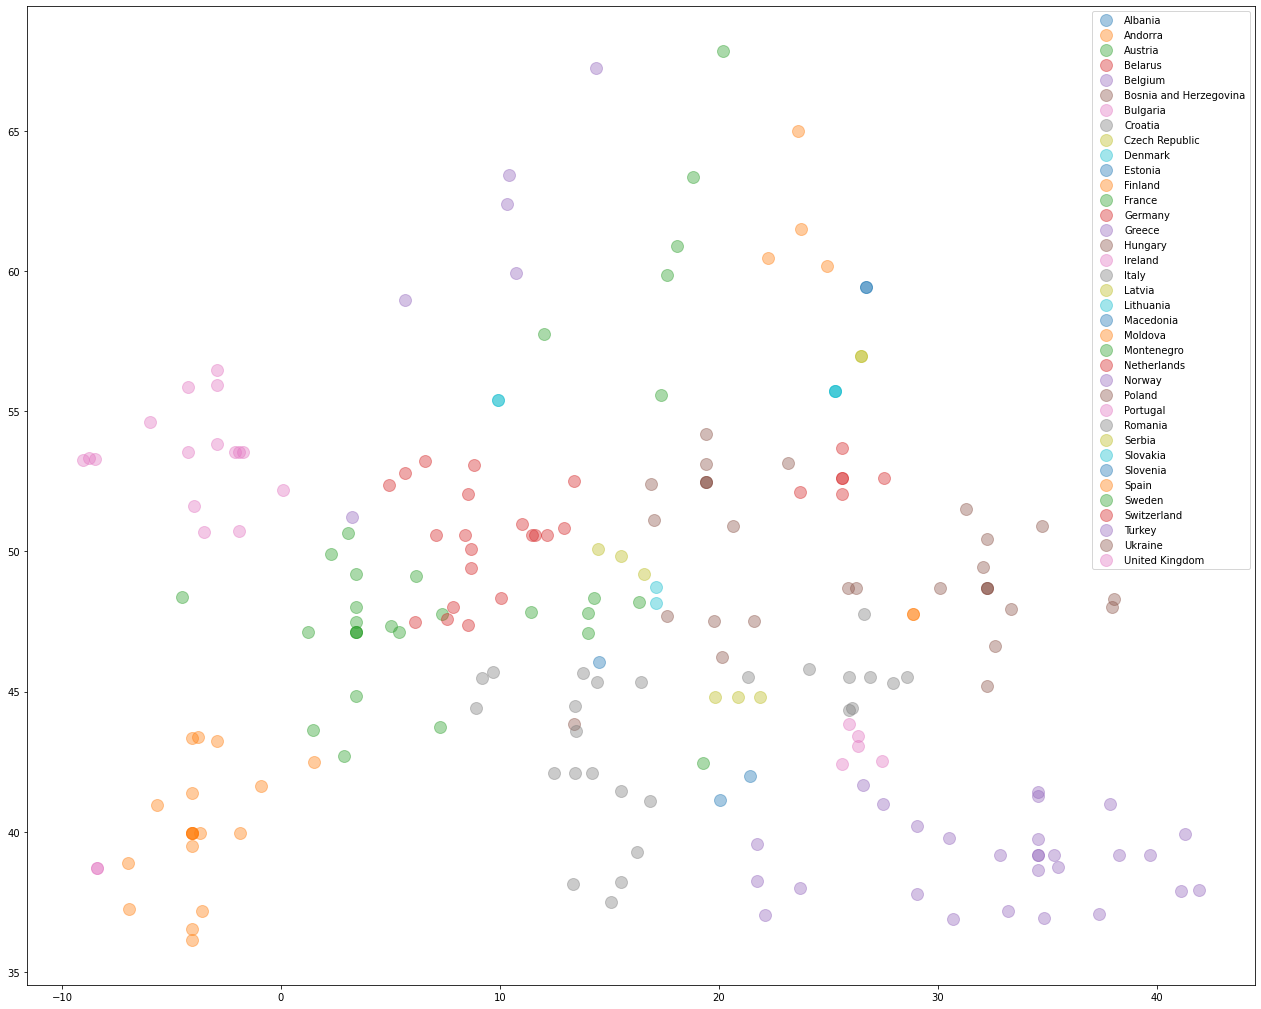

In [15]:
country_group = eutempdf.groupby('country')
fig, axes = plt.subplots()
fig.set_size_inches(22,18)

for name, group in country_group:
    axes.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=12, label=name, alpha=0.4)
axes.legend()
plt.show()

***3. The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups)***

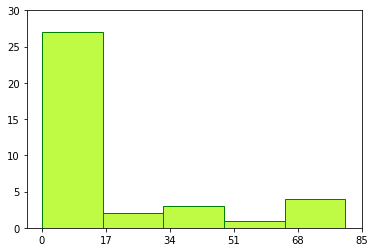

In [16]:
# plt.hist(eutempdf['population'].unique(), bins=5)
plt.figure(figsize=(6, 4))
plt.hist(eutempdf['population'].unique(),bins=5,color='#bffa45',edgecolor='green')
plt.yticks(range(0,31, 5))
plt.xticks(range(0, 86, 17))
plt.show()

**4. Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.**

Text(0.5, 1.0, 'Not EU and Not Coastline')

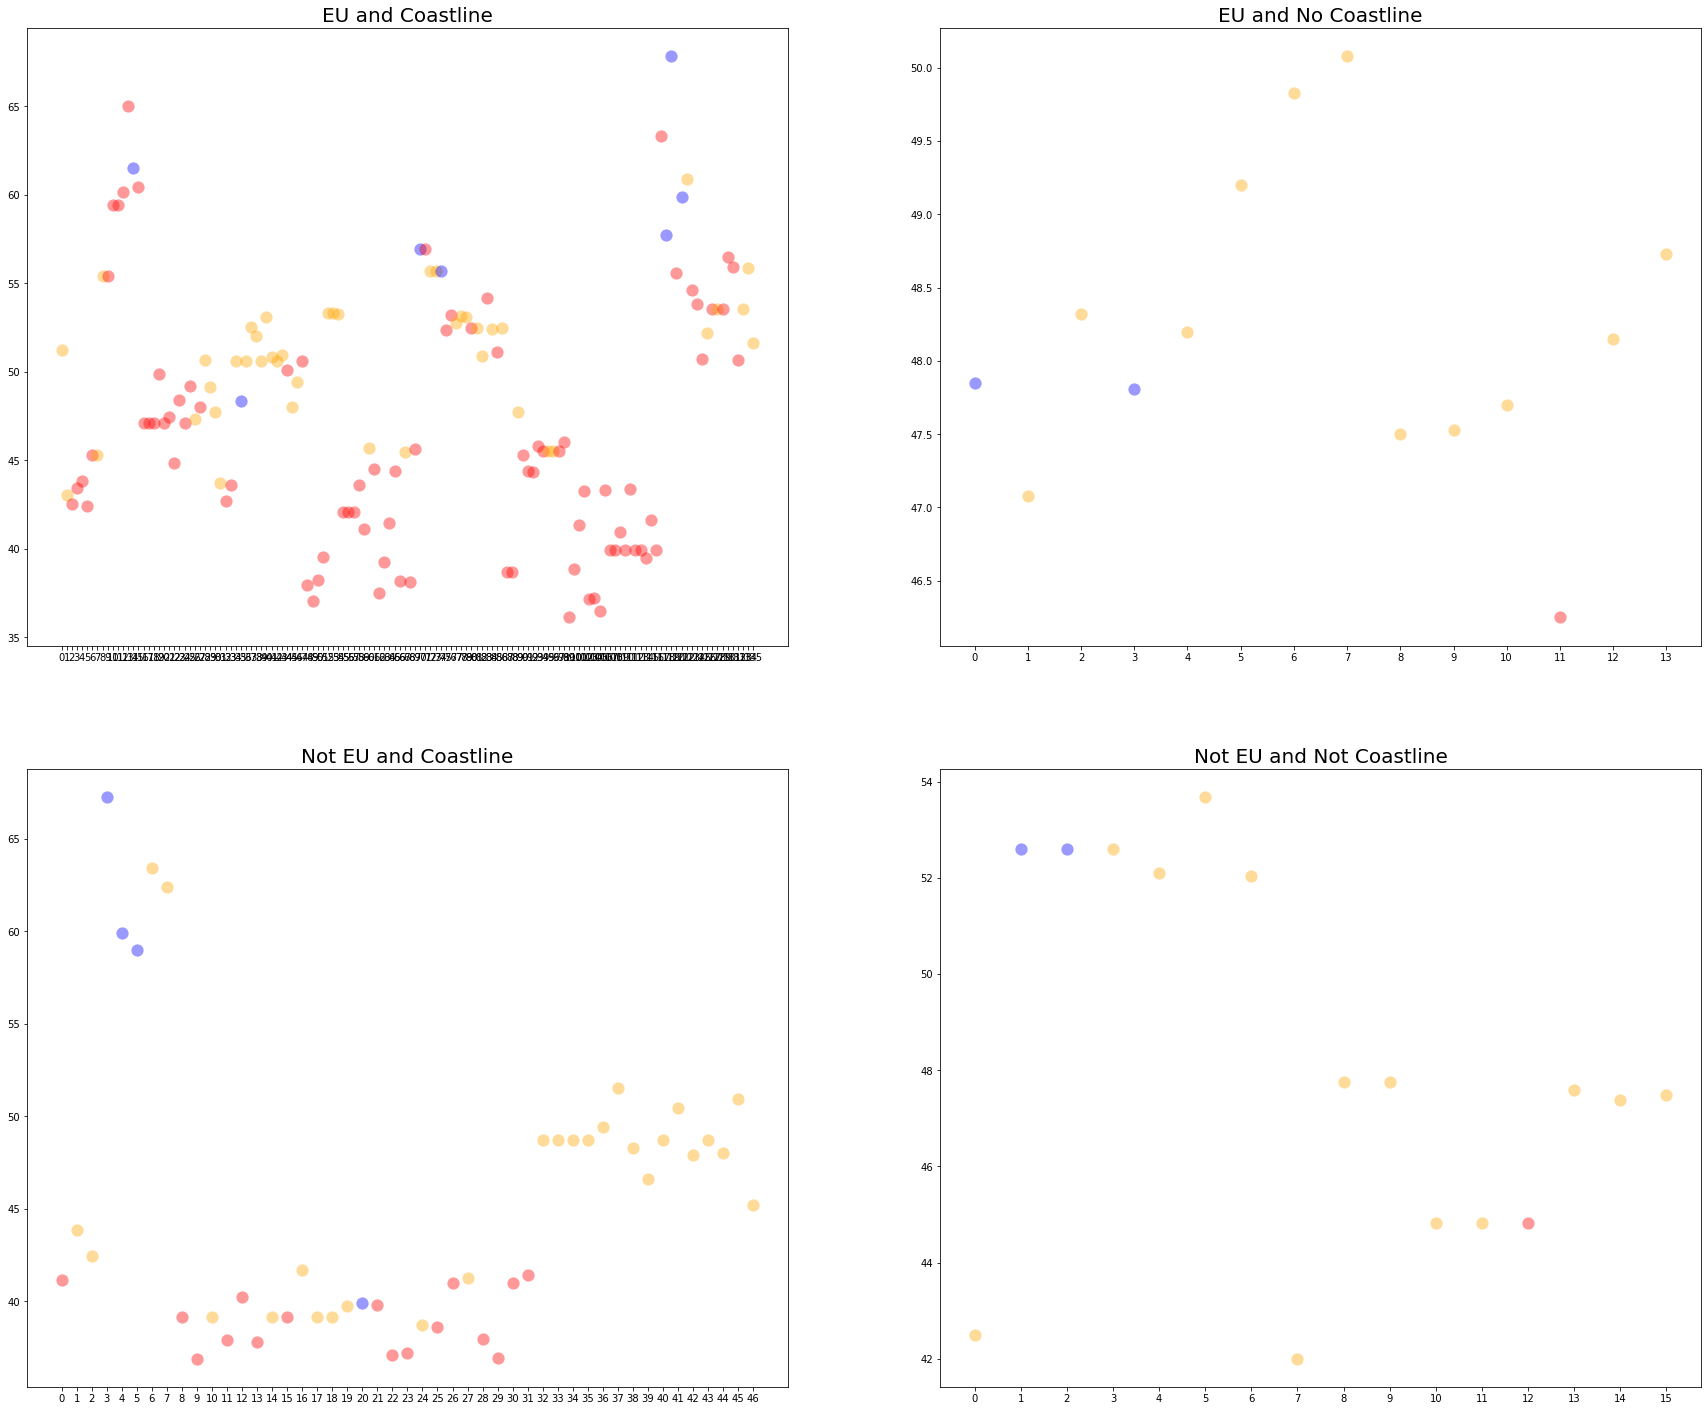

In [17]:
fig, axes = plt.subplots(2,2,figsize=(30,25))



yes_yes_df = eutempdf[(eutempdf['EU'] == 'yes') & (eutempdf['coastline'] == 'yes')]
yes_no_df = eutempdf[(eutempdf['EU'] == 'yes') & (eutempdf['coastline'] == 'no')]
no_yes_df = eutempdf[(eutempdf['EU'] == 'no') & (eutempdf['coastline'] == 'yes')]
no_no_df = eutempdf[(eutempdf['EU'] == 'no') & (eutempdf['coastline'] == 'no')]

def get_colors(df):
    color_list = []
    for index, item in enumerate(df['temperature']):
        if item > 10:
            color_list.append('red')
        elif item < 6:
            color_list.append('blue')
        elif item >= 6 and item <= 10:
            color_list.append('orange')
    return color_list

yes_yes_colors = get_colors(yes_yes_df)
yes_no_colors = get_colors(yes_no_df)
no_yes_colors = get_colors(no_yes_df)
no_no_colors = get_colors(no_no_df)

index = 0
for row in yes_yes_df.iterrows():
    ser = row[1]
    axes[0,0].scatter(ser['city'], ser['latitude'], c=yes_yes_colors[index] ,s=150, linewidth=0, alpha=0.4)
    index+=1

index = 0
for row in yes_no_df.iterrows():
    ser = row[1]
    axes[0,1].scatter(ser['city'], ser['latitude'], c=yes_no_colors[index] ,s=150, linewidth=0, alpha=0.4)
    index+=1

index = 0
for row in no_yes_df.iterrows():
    ser = row[1]
    axes[1,0].scatter(ser['city'], ser['latitude'], c=no_yes_colors[index] ,s=150, linewidth=0, alpha=0.4)
    index+=1

index = 0
for row in no_no_df.iterrows():
    ser = row[1]
    axes[1,1].scatter(ser['city'], ser['latitude'], c=no_no_colors[index] ,s=150, linewidth=0, alpha=0.4)
    index+=1


#yes_yes plot
axes[0,0].set_xticks(range(0, yes_yes))
axes[0,0].set_xticklabels(range(0, yes_yes))
axes[0,0].set_title('EU and Coastline', fontsize=20)

#yes_no plot
axes[0,1].set_xticks(range(0, yes_no))
axes[0,1].set_xticklabels(range(0, yes_no))
axes[0,1].set_title('EU and No Coastline', fontsize=20)

#no_yes plot
axes[1,0].set_xticks(range(0, no_yes))
axes[1,0].set_xticklabels(range(0, no_yes))
axes[1,0].set_title('Not EU and Coastline', fontsize=20)

#no_no plot
axes[1,1].set_xticks(range(0, no_no))
axes[1,1].set_xticklabels(range(0, no_no))
axes[1,1].set_title('Not EU and Not Coastline', fontsize=20)